### Source of data set: from Kaggle: This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works. The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.



In [150]:
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

train_file = '/Users/praneeth/Downloads/train.csv'
test_file = '/Users/praneeth/Downloads/test.csv'




In [114]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [22]:
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [21]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [50]:
#train.groupby('Embarked').Embarked.count()
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
total = train.isnull().sum().sort_values(ascending = False)

In [9]:
type(total)

pandas.core.series.Series

In [151]:
percent1 = train.isnull().sum()/train.isnull().count()
percent2 = round(percent1, 4).sort_values(ascending = False)*100
print(percent2)
print(percent2.dtype)

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64
float64


In [152]:
missing_values = pd.concat([total, percent2], axis = 1, keys = ['Total null', 'percent null'])
print(missing_values)
print(type(missing_values))

             Total null  percent null
Cabin               687         77.10
Age                 177         19.87
Embarked              2          0.22
Fare                  0          0.00
Ticket                0          0.00
Parch                 0          0.00
SibSp                 0          0.00
Sex                   0          0.00
Name                  0          0.00
Pclass                0          0.00
Survived              0          0.00
PassengerId           0          0.00
<class 'pandas.core.frame.DataFrame'>


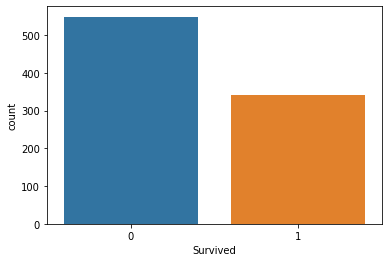

In [12]:

sns.countplot(train['Survived'], label = "Count")


In [17]:
#very important result in plotting



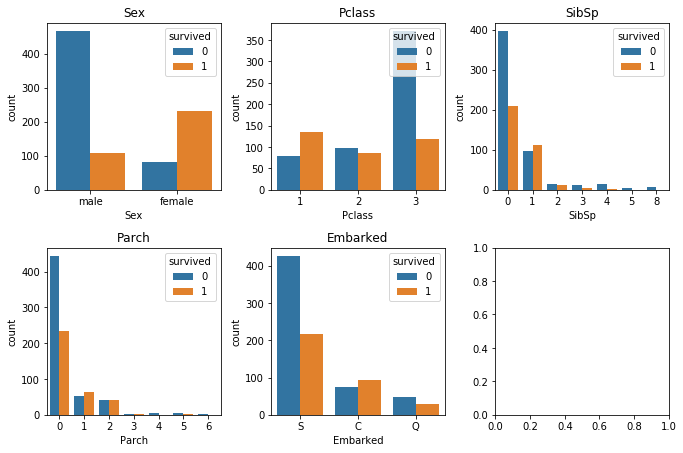

In [135]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows*3.2) )

for r in range(n_rows):
    for c in range(n_cols):
        try:
            i = r*n_cols + c
            ax = axs[r][c]
            sns.countplot(train[cols[i]], hue = train["Survived"], ax = ax)
            ax.set_title(cols[i])
            ax.legend(title = "survived", loc = 'upper right')
        except:
            pass

            
plt.tight_layout()
        

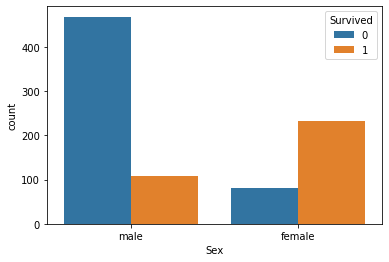

In [69]:
sns.countplot(train.Sex, hue = train.Survived)

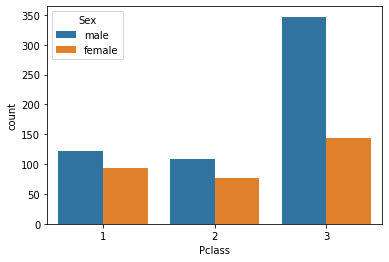

In [72]:
sns.countplot(train.Pclass, hue = train.Sex)

In [18]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [153]:
train = train.drop(['PassengerId'], axis = 1)


In [154]:
test = test.drop(['PassengerId'], axis = 1)

In [155]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)


In [156]:
train.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3


In [157]:
#since embarked contains only 2 null values
data = [train, test]
for dataset in data:
    dataset.Embarked = dataset.Embarked.fillna('S')

In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [160]:
#converting Fare from float to int
data = [train, test]


for dataset in data:
    dataset.Fare = dataset.Fare.fillna(0)
    dataset.Fare = dataset.Fare.astype(int)

In [161]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)


In [162]:
data = [train, test]


genders = {"male": 0, "female": 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [163]:
train.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [164]:
data = [train, test]

train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)



In [165]:
data = [train, test]

ports = {"S": 0, "C": 1, "Q":2}

train.Embarked = train.Embarked.map(ports)
test.Embarked = test.Embarked.map(ports)



In [183]:
train2 = pd.read_csv(train_file)
test2 = pd.read_csv(test_file)
data = [train2, test2]

#for dataset in data:
train2.Age.isnull().sum()
test2.Age.isnull().sum()
#these are non zero finite values need to be worked around.

for dataset in data:
    mean = dataset["Age"].mean()
    print(mean)
    std = test["Age"].std()
    print(std)
    is_null = dataset.Age.isnull().sum()
    print(is_null)
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    print(rand_age)
    
    age_slice = dataset["Age"].copy()
    print(age_slice)
    age_slice[np.isnan(age_slice)]= rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)

29.69911764705882
1.8207324369608737
177
[27 30 30 28 28 27 29 30 29 27 27 29 28 30 28 29 27 30 28 29 29 30 28 29
 29 29 30 27 29 29 30 27 30 29 29 30 29 27 29 29 29 29 30 30 27 27 30 27
 28 27 29 30 30 30 28 30 27 29 28 30 27 29 28 28 27 27 27 30 29 29 29 28
 29 28 27 27 29 30 29 27 27 29 28 30 30 29 28 30 29 27 30 30 30 29 29 27
 27 27 29 29 27 30 28 30 28 29 28 27 29 29 30 27 27 28 29 27 27 27 29 28
 30 28 30 29 28 28 28 28 29 28 27 30 27 29 30 27 28 27 30 28 27 28 27 28
 29 27 30 30 28 29 30 27 29 28 29 30 29 30 28 30 30 30 30 28 30 27 30 28
 30 27 29 29 27 28 27 28 28]
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
30.272590361445783
1.8207324369608737
86
[30 28 28 28 28 31 28 31 31 31 31 31 31 29 29 31 31 30 28 31 28 31 28 30
 28 31 28 28 28 30 29 31 28 31 28 31 30 31 29 31 30 29 29 30 28 29 29 31
 31 31 29 30 30 31 29 31 30 28 30 28 31 29 30 28 30 29 28 28 

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
 8   Deck      891 non-null    int64
 9   Title     891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [173]:
test.Age.describe()

count    418.000000
mean      29.937799
std       13.189486
min        0.000000
25%       21.000000
50%       28.000000
75%       38.000000
max       76.000000
Name: Age, dtype: float64

In [187]:
data = [train2, test2]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11, 'Age'] = 0
    dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age'] = 1
    dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22), 'Age'] = 2
    dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27), 'Age'] = 3
    dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33), 'Age'] = 4
    dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40), 'Age'] = 5
    dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66), 'Age'] = 6
    dataset.loc[(dataset['Age']>66), 'Age'] = 6


In [191]:
train.Age = train2.Age
test.Age = test2.Age

In [192]:
train.Age.value_counts()

4    259
3    150
6    148
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

In [193]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


In [203]:
train.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class
0,0,3,0,2,1,0,0,0,8,1,1,0,6
1,1,1,1,5,1,0,3,1,3,3,1,0,5
2,1,3,1,3,0,0,0,0,8,2,0,1,9
3,1,1,1,5,1,0,3,0,3,3,1,0,5


In [198]:
data = [train, test]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

for dataset in data:
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives']==0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)



In [200]:
train.not_alone.value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [202]:
#creating new features

data = [train, test]

for dataset in data:
    dataset['Age_Class'] = dataset.Age * dataset.Pclass

In [207]:
data = [train, test]

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)


        

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pclass           418 non-null    int64
 1   Sex              418 non-null    int64
 2   Age              418 non-null    int64
 3   SibSp            418 non-null    int64
 4   Parch            418 non-null    int64
 5   Fare             418 non-null    int64
 6   Embarked         418 non-null    int64
 7   Deck             418 non-null    int64
 8   Title            418 non-null    int64
 9   relatives        418 non-null    int64
 10  not_alone        418 non-null    int64
 11  Age_Class        418 non-null    int64
 12  Fare_Per_Person  418 non-null    int64
dtypes: int64(13)
memory usage: 42.6 KB


In [211]:
X_train = train.drop("Survived", axis = 1)
Y_train = train["Survived"]
X_test = test


In [213]:
#Stochastic Gradient descent

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

#Random forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#K Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

#Gaussian Naive Bayes:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

#Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

#Linear Support Vector Machine

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)


#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


/Users/praneeth/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/praneeth/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [216]:
Colnames = ['Support Vector machine', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent', 'Decision Tree']
Score_values = [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]

In [220]:
results = pd.DataFrame({'Model': Colnames, 'Score': Score_values})

In [222]:
results = results.set_index('Score')

In [224]:
results.sort_values(by = 'Score', ascending = False)

,Model
Score,
92.26,Random Forest
92.26,Decision Tree
87.54,KNN
81.59,Support Vector machine
81.59,Logistic Regression
81.59,Perceptron
77.78,Naive Bayes
40.07,Stochastic Gradient Descent


In [225]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.76666667 0.84269663 0.73033708 0.83146067 0.85393258 0.82022472
 0.82022472 0.78651685 0.86516854 0.83146067]
Mean: 0.8148689138576779
Standard Deviation: 0.039637449248232384


In [229]:
np.round(random_forest.feature_importances_*100, 2)

array([ 6.68, 16.51,  6.98,  4.16,  2.35,  6.07,  5.01,  9.36, 21.4 ,
        5.86,  1.13,  9.95,  4.55])

In [232]:
importances = pd.DataFrame({'Feature':X_train.columns, 'Feature Importance': np.round(random_forest.feature_importances_*100, 2)})

importances = importances.sort_values(by = 'Feature Importance', ascending = False).set_index('Feature')

In [234]:
importances

,Feature Importance
Feature,
Title,21.40
Sex,16.51
Age_Class,9.95
Deck,9.36
Age,6.98
Pclass,6.68
Fare,6.07
relatives,5.86
Embarked,5.01


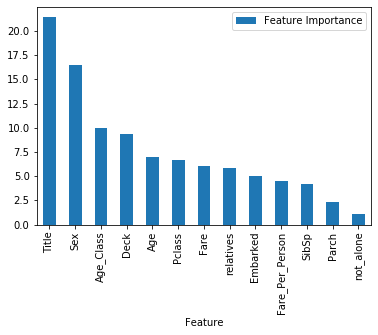

In [241]:
importances.plot.bar()

In [242]:
#Random forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


In [243]:
Y_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [247]:
PassengerId = test2.PassengerId

In [252]:
Survived = Y_prediction

output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': Survived})
output.set_index('PassengerId')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [255]:
output.to_csv('/Users/praneeth/Downloads/Titanic/sub_random_forests_new.csv')